# Analyse av anki-data
Gjort ved hjelp av python, uten bruk av pandas.

In [57]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pytz
import csv

In [6]:
with open("anki-reviews.csv") as file:
    data = csv.DictReader(file)
    reviews = list(data)
reviews[0]

{'id': '1645550962771',
 'cid': '1645550870303',
 'usn': '0',
 'ease': '3',
 'ivl': '-600',
 'lastIvl': '-60',
 'factor': '0',
 'time': '15705',
 'type': '0'}

Text(0.5, 1.0, 'Review distribution over time')

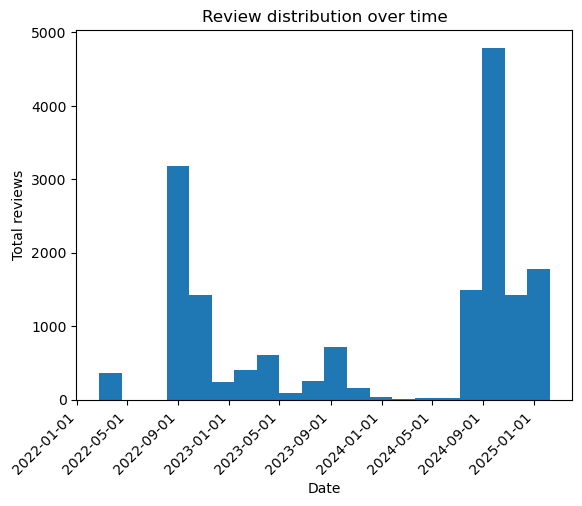

In [29]:
dates = [
    datetime.utcfromtimestamp(int(r["id"]) / 1000).astimezone(
        pytz.timezone("Europe/Oslo")
    )
    for r in reviews
]
fig, ax = plt.subplots()
ax.hist(dates, bins=20)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Date")
ax.set_ylabel("Total reviews")
ax.set_title("Review distribution over time")

Text(0.5, 1.0, 'Card type distribution')

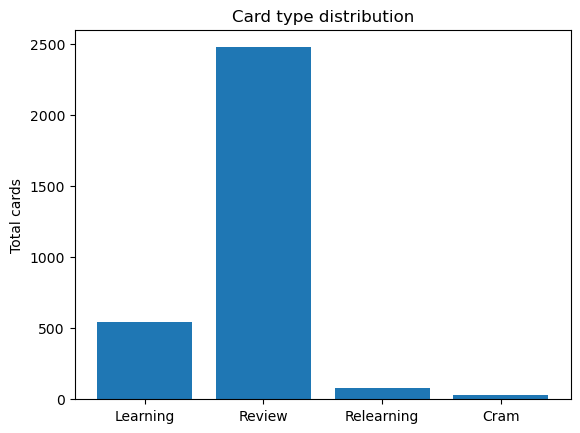

In [50]:
cards = {}
for r in reviews:
    cards[r["cid"]] = r
cards = list(cards.values())

card_types = {}
for c in cards:
    card_types[c["type"]] = card_types.get(c["type"], 0) + 1
card_types = sorted(card_types.items(), key=lambda c: c[0])

fig, ax = plt.subplots()
ax.bar(*zip(*card_types))
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(["Learning", "Review", "Relearning", "Cram"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Total cards")
ax.set_title("Card type distribution")

Text(0.5, 1.0, 'Review ease distribution')

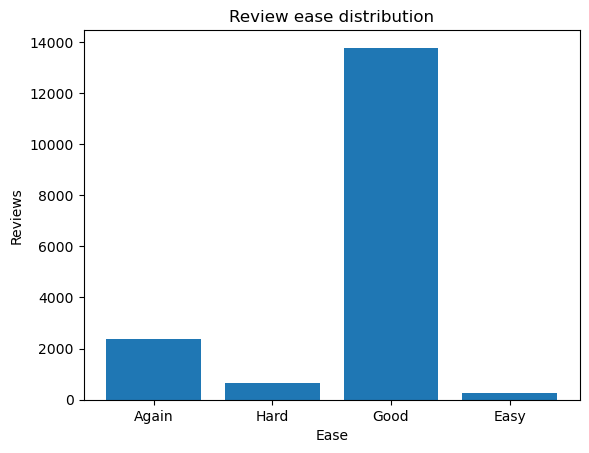

In [55]:
eases = {}
for r in reviews:
    eases[r["ease"]] = eases.get(r["ease"], 0) + 1
eases = sorted(eases.items(), key=lambda e: e[0])

fig, ax = plt.subplots()
ax.bar(*zip(*eases))
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(["Again", "Hard", "Good", "Easy"], rotation=0)
ax.set_xlabel("Ease")
ax.set_ylabel("Reviews")
ax.set_title("Review ease distribution")

Text(0.5, 1.0, 'Card interval distribution')

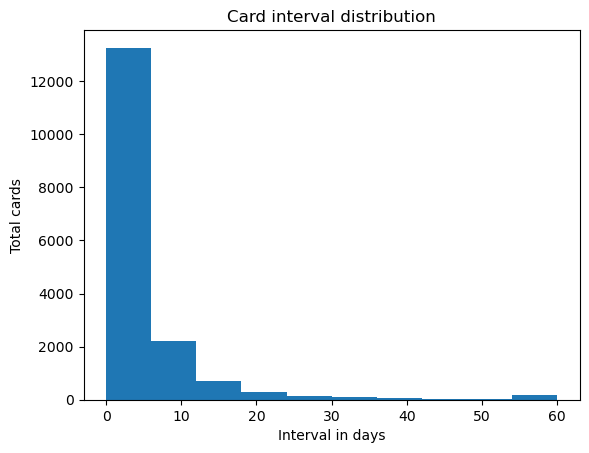

In [63]:
# Could just directly / 1000 instead of going through timedelta
times = [timedelta(milliseconds=int(r["time"])).total_seconds() for r in reviews]

fig, ax = plt.subplots()
ax.hist(times)
ax.set_xlabel("Interval in days")
ax.set_ylabel("Total cards")
ax.set_title("Card interval distribution")